In [1]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway

In [39]:
def get_features_num_classification(df, target_col, pvalue=0.05):
    """
    Identifica columnas numéricas en un DataFrame que tienen un resultado significativo
    en la prueba ANOVA con respecto a una columna objetivo categórica.

    Parámetros:
    df (pd.DataFrame): El DataFrame de entrada que contiene los datos.
    target_col (str): El nombre de la columna objetivo en el DataFrame. Esta debe ser 
                      una columna categórica con baja cardinalidad (10 o menos valores únicos).
    pvalue (float): El nivel de significancia para la prueba ANOVA. El valor predeterminado es 0.05.

    Retorna:
    list: Una lista de nombres de columnas numéricas que tienen una relación significativa con 
          la columna objetivo según la prueba ANOVA.
          Retorna None si alguna de las comprobaciones de los argumentos de entrada falla, 
          e imprime un mensaje indicando la razón.
    """
    
    # Comprobación de que el DataFrame no está vacío
    if df.empty:
        print("El DataFrame está vacío.")
        return None
    
    # Comprobación de que target_col está en el DataFrame
    if target_col not in df.columns:
        print(f"La columna '{target_col}' no se encuentra en el DataFrame.")
        return None
    
    # Comprobación de que target_col es categórica con baja cardinalidad
    if not isinstance(df[target_col].dtype, pd.CategoricalDtype) and not pd.api.types.is_object_dtype(df[target_col]):
        print(f"La columna '{target_col}' no es categórica.")
        return None
    
    if df[target_col].nunique() > 10:
        print(f"La columna '{target_col}' tiene demasiadas categorías (más de 10).")
        return None
    
    # Comprobación de que pvalue es un float y está en el rango correcto
    if not isinstance(pvalue, float) or not (0 < pvalue < 1):
        print("El valor de 'pvalue' debe ser un float entre 0 y 1.")
        return None
    
    # Filtrar las columnas numéricas
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    
    # Lista para almacenar las columnas que cumplen con el criterio
    significant_columns = []
    
    for col in numeric_cols:
        groups = [df[col][df[target_col] == category] for category in df[target_col].unique()]
        f_stat, p_val = f_oneway(*groups)
        if p_val <= pvalue:
            significant_columns.append(col)
    
    return significant_columns

Ejemplo de uso

In [20]:
df = pd.read_csv("./data/BankChurners.csv")

In [21]:
df.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,0.000055,0.99994
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,0.000123,0.99988
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048,0.000086,0.99991
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113,0.000045,0.99996
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144,0.000303,0.99970


In [22]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [41]:
get_features_num_classification(df,"Gender",0.05)

['CLIENTNUM',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Avg_Utilization_Ratio',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

def eval_model(target, predictions, problem_type, metrics):
    """
    Evalúa un modelo de regresión o clasificación en base a las métricas especificadas.

    Argumentos:
    - target (array-like): Valores verdaderos de los datos objetivo.
    - predictions (array-like): Valores predichos por el modelo.
    - problem_type (str): Tipo de problema, 'regression' para regresión o 'classification' para clasificación.
    - metrics (list of str): Lista de métricas a evaluar. Las métricas posibles dependen del tipo de problema.

    Retorna:
    - tuple: Tupla con los resultados de las métricas solicitadas, en el orden en que aparecen en la lista de entrada.
    """
    results = []

    if problem_type == 'regression':
        if not all(metric in ['RMSE', 'MAE', 'MAPE', 'GRAPH'] for metric in metrics):
            raise ValueError('Las métricas para regresión deben ser "RMSE", "MAE", "MAPE", "GRAPH".')
        
        for metric in metrics:
            if metric == 'RMSE':
                rmse = np.sqrt(mean_squared_error(target, predictions))
                print(f'RMSE: {rmse}')
                results.append(rmse)
            elif metric == 'MAE':
                mae = mean_absolute_error(target, predictions)
                print(f'MAE: {mae}')
                results.append(mae)
            elif metric == 'MAPE':
                try:
                    mape = np.mean(np.abs((target - predictions) / target)) * 100
                except ZeroDivisionError:
                    raise ValueError('No se puede calcular el MAPE porque el target contiene valores 0')
                print(f'MAPE: {mape}')
                results.append(mape)
            elif metric == 'GRAPH':
                plt.figure(figsize=(12, 8))
                plt.scatter(target, predictions, alpha=0.3)
                plt.xlabel('Target')
                plt.ylabel('Predictions')
                plt.title('Target Vs Predictions')
                plt.grid(True)
                plt.show()

    elif problem_type == 'classification':
        if not all(metric.startswith(('ACCURACY', 'PRECISION', 'RECALL', 'CLASS_REPORT', 'MATRIX')) for metric in metrics):
            raise ValueError('Las métricas para clasificación deben ser "ACCURACY", "PRECISION", "RECALL", "CLASS_REPORT", "MATRIX".')
        
        for metric in metrics:
            if metric == 'ACCURACY':
                accuracy = accuracy_score(target, predictions)
                print(f'Accuracy: {accuracy}')
                results.append(accuracy)
            elif metric == 'PRECISION':
                precision = precision_score(target, predictions, average='macro')
                print(f'Precision: {precision}')
                results.append(precision)
            elif metric == 'RECALL':
                recall = recall_score(target, predictions, average='macro')
                print(f'Recall: {recall}')
                results.append(recall)
            elif metric == 'CLASS_REPORT':
                report = classification_report(target, predictions)
                print('Classification Report')
                print(report)
            elif metric == 'MATRIX':
                con_matrix = confusion_matrix(target, predictions)
                print('Confusion Matrix')
                print(con_matrix)
                disp = ConfusionMatrixDisplay(confusion_matrix=con_matrix)
                disp.plot()
                plt.show()

    else:
        raise ValueError('El tipo de problema debe ser "regression" o "classification".')
    
    return tuple(results)


RMSE: 0.7455813830127752
MAE: 0.5332001304956989
MAPE: 31.95218741362174


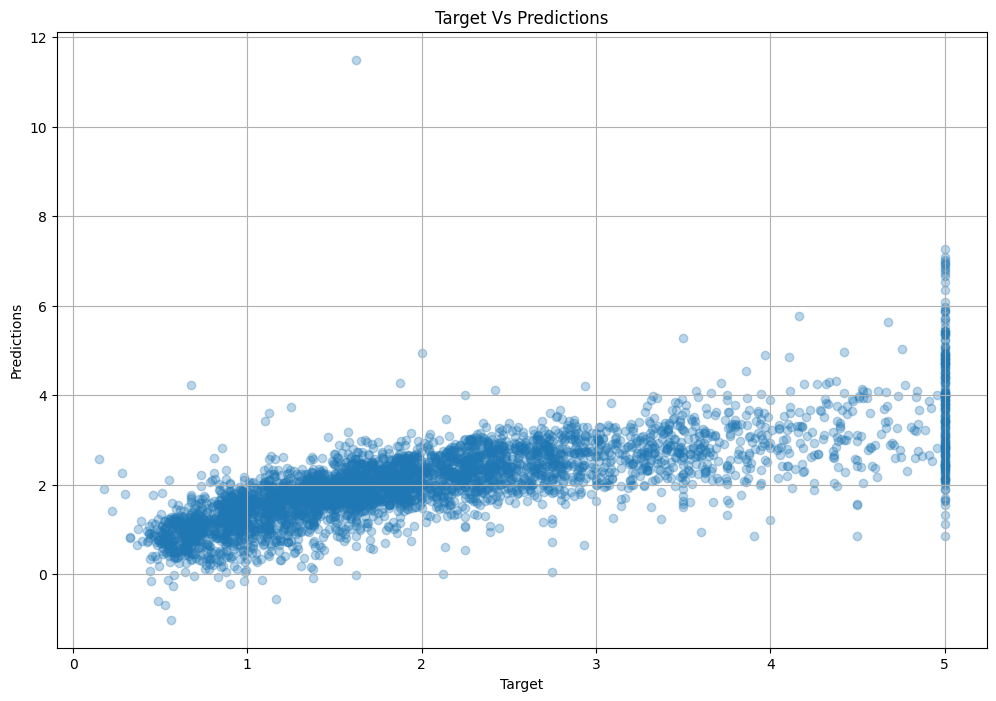

(0.7455813830127752, 0.5332001304956989, 31.95218741362174)

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Cargar el dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Dividir el dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un modelo simple
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Evaluar el modelo
eval_model(y_test, predictions, 'regression', ['RMSE', 'MAE', 'MAPE', 'GRAPH'])


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


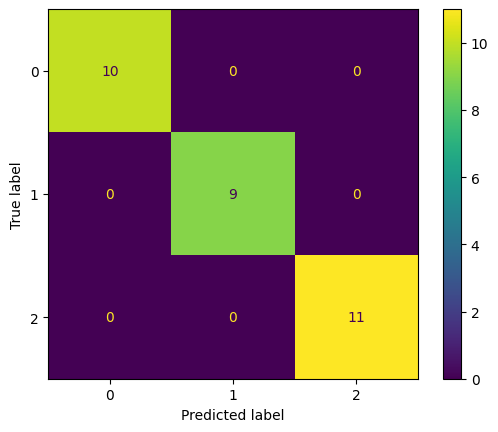

(1.0, 1.0, 1.0)

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Cargar el dataset
data = load_iris()
X = data.data
y = data.target

# Dividir el dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un modelo simple
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Evaluar el modelo
eval_model(y_test, predictions, 'classification', ['ACCURACY', 'PRECISION', 'RECALL', 'CLASS_REPORT', 'MATRIX'])
